In [1]:
from tensorflow.keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
len(train_data), len(test_data), len(train_labels)    # The number of training examples and test examples

(8982, 2246, 8982)

In [4]:
# Each example is list of integers(word indices)
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

## Decoding newswires back to text

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)
decoded_newswire


550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

The label associated with an example is an integer between 0 and 45 -- a topic index

In [6]:
train_labels[10]

np.int64(3)

Lets vectorize the data

In [7]:
train_data.shape, train_labels.shape

((8982,), (8982,))

In [8]:
import numpy as np

In [9]:
def vectorize_data(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      for j in sequence:
        results[i, sequence] = 1
    return results

In [10]:
x_train = vectorize_data(train_data)
x_test = vectorize_data(test_data)

Lets vectorize the labels using one hot encoding

In [11]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

y_test = to_one_hot(test_labels)
y_train = to_one_hot(train_labels)

In [12]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

NOTE: There is built-in way to do this with keras

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_test = to_categorical(test_labels)
y_train = to_categorical(train_labels)

In [15]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
y_train.shape, y_test.shape

((8982, 46), (2246, 46))

## Building your model

In [17]:
from tensorflow import keras

In [18]:
model = keras.Sequential([
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(46, activation="softmax")
])

## compiling the model

In [19]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

Validating your approach

In [20]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

## Training the model

In [21]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.3942 - loss: 3.1800 - val_accuracy: 0.6330 - val_loss: 1.7961
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6723 - loss: 1.6121 - val_accuracy: 0.6950 - val_loss: 1.3401
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7400 - loss: 1.1898 - val_accuracy: 0.7520 - val_loss: 1.1435
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7964 - loss: 0.9655 - val_accuracy: 0.7860 - val_loss: 1.0352
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8300 - loss: 0.7855 - val_accuracy: 0.7950 - val_loss: 0.9752
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8662 - loss: 0.6189 - val_accuracy: 0.7970 - val_loss: 0.9461
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8920 - loss: 0.5341 - val_accuracy: 0.8020 - val_loss: 0.9207
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9075 - loss: 0.4434 - val_accuracy: 0.8200 - 

### Plotting the loss and accuracy curves
To inspect overfitting

In [22]:
import matplotlib.pyplot as plt

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

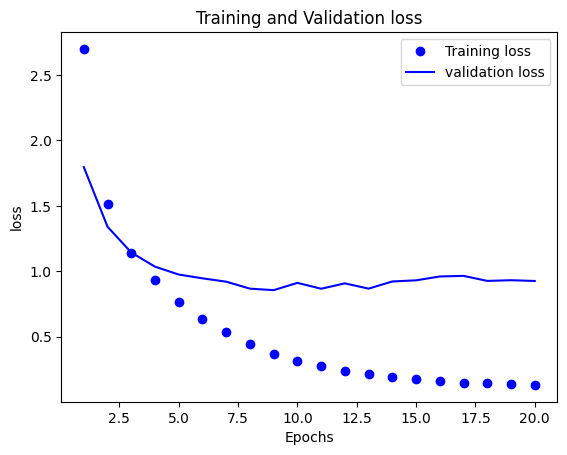

In [24]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs"); plt.ylabel("loss")
plt.legend()
plt.show()

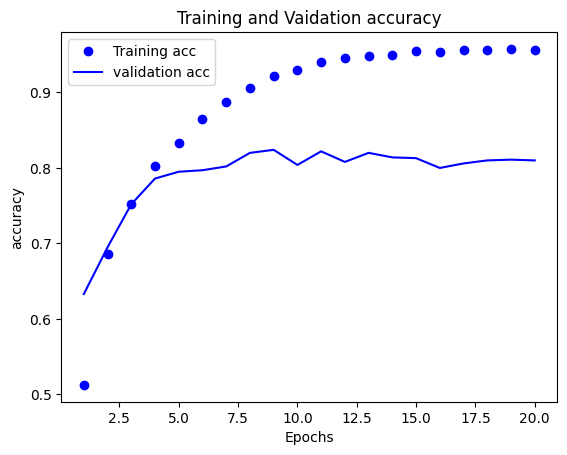

In [25]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="validation acc")
plt.title("Training and Vaidation accuracy")
plt.xlabel("Epochs") ; plt.ylabel("accuracy")
plt.legend()
plt.show()


From the two plots, it can be seen that the model begins to overfit after about 9 to 10 epochs. lets train another model using 9 epochs from scratch.

In [26]:
model = keras.Sequential([
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(46, activation="softmax")
])

In [27]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [28]:
model.fit(x_train, y_train,
          epochs=9, batch_size=512)

result = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.2989 - loss: 3.1884
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6712 - loss: 1.6193
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7271 - loss: 1.2369
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7824 - loss: 0.9771
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8285 - loss: 0.7790
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8590 - loss: 0.6497
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8932 - loss: 0.5464
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9009 - loss: 0.4713
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9221 - loss: 0.3749
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8013 - loss: 0.9248


In [29]:
result

[0.9337943196296692, 0.790739119052887]

what will be the accuracy of a random baseline? remember that with a balanced binary classification problem, the accuracy reach by purely random classifier would be 50%.

In [30]:
import copy

In [31]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

np.float64(0.18210151380231523)

you can see the accuracy is about 19%. In this light, our model seem pretty good

## predicitons

In [32]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [33]:
# each entry in the predictions is a vector of length 46;
predictions[0].shape

(46,)

In [34]:
# the coefficient sum up to 1
np.sum(predictions[0])

np.float32(0.9999998)

In [35]:
# the largest entry is the predicted class - the class with the highest probability:
np.argmax(predictions[0])

np.int64(3)

In [36]:
predictions[0]

array([1.10069384e-04, 4.88252990e-04, 2.51759921e-04, 6.43897474e-01,
       3.41320723e-01, 5.23723102e-05, 1.53524379e-04, 9.17991347e-05,
       2.93536694e-03, 1.07165746e-04, 4.59310744e-04, 3.87991837e-04,
       1.49241489e-04, 5.04325028e-04, 2.74002668e-04, 1.70230874e-06,
       3.25371954e-03, 2.56163039e-04, 5.81178865e-05, 5.45798335e-04,
       1.02964160e-03, 1.78220012e-04, 5.04653835e-05, 2.96017155e-04,
       5.67256357e-05, 9.74590876e-05, 2.09597438e-05, 9.02479369e-05,
       1.24362869e-05, 8.30022836e-05, 3.43539032e-05, 2.50880548e-04,
       9.73501574e-06, 1.79089711e-05, 1.41024924e-04, 3.33569515e-05,
       8.67579074e-04, 6.05769492e-05, 1.04749506e-05, 6.57234632e-04,
       1.58747625e-05, 5.66114730e-04, 4.26202496e-06, 1.05488994e-04,
       6.85589612e-06, 4.02617070e-06], dtype=float32)

##A different way to handle label
The only thing this approach will change is the choice of loss function. Here, we will use sparse_categorical_crossentropy:

In [37]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [38]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [39]:
y_train[0]

np.int64(3)

In [40]:
y_train.shape

(8982,)